# Lab 2

In [36]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia-340-2025-fall-francis-fyufhmhfyfuy4767546/Crash_Reporting_-_Drivers_Data.csv') # load the data from s3
df.head() #show the top 5 rows

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,MCP3296002G,240018653,MONTGOMERY,Property Damage Crash,04/21/2024 06:53:00 PM,County Route,NaN,NaN,NaN,NaN,...,Northbound,25,No,No,2013,HYUNDAI,SONATA,39.105339,-76.989845,"(39.10533874, -76.98984545)"
1,MCP276700BF,240012321,MONTGOMERY,Property Damage Crash,03/14/2024 05:23:00 PM,US (State),COLUMBIA PIKE (SB/L),NaN,NaN,NaN,...,Southbound,45,No,No,0,NaN,NaN,39.040003,-76.997223,"(39.04000338, -76.99722287)"
2,MCP32790038,240022955,MONTGOMERY,Property Damage Crash,05/15/2024 07:30:00 AM,Maryland (State) Route,VEIRS MILL RD (WB/L),NaN,NaN,NaN,...,Northbound,45,No,No,2006,CHEVROLET,COBALT,39.073096,-77.111254,"(39.0730963, -77.1112541)"
3,MCP34000014,240019831,MONTGOMERY,Property Damage Crash,04/28/2024 05:30:00 PM,County Route,HARDING DR,NaN,NaN,NaN,...,Southbound,25,No,No,2012,NISSAN,ALTIMA,39.021944,-77.018300,"(39.02194389, -77.01829961)"
4,MCP3341003F,240011829,MONTGOMERY,Injury Crash,03/12/2024 07:30:00 AM,Private Route,NaN,CONNECTICUT AVE,NaN,NaN,...,Southbound,35,No,NaN,2015,CHEVROLET,SILVERADO,39.090304,-77.071180,"(39.09030389, -77.07118035)"


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201441 entries, 0 to 201440
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  201441 non-null  object 
 1   Local Case Number              201441 non-null  object 
 2   Agency Name                    201441 non-null  object 
 3   ACRS Report Type               201441 non-null  object 
 4   Crash Date/Time                201441 non-null  object 
 5   Route Type                     181701 non-null  object 
 6   Road Name                      179038 non-null  object 
 7   Cross-Street Name              166950 non-null  object 
 8   Off-Road Description           18700 non-null   object 
 9   Municipality                   19126 non-null   object 
 10  Related Non-Motorist           6523 non-null    object 
 11  Collision Type                 200856 non-null  object 
 12  Weather                       

In [39]:
df.shape #showing 0 rows and 39 columns

(201441, 39)

In [40]:
df.describe() #shows the summary statistics of the data

,Speed Limit,Vehicle Year,Latitude,Longitude
count,201441.000000,201441.000000,201441.000000,201441.000000
mean,32.228419,1965.573597,39.083011,-77.112048
std,11.294348,341.743378,0.071820,0.098130
min,0.000000,0.000000,37.720000,-79.486000
25%,25.000000,2006.000000,39.024428,-77.189245
50%,35.000000,2012.000000,39.074813,-77.105153
75%,40.000000,2016.000000,39.139660,-77.039097
max,75.000000,9999.000000,39.990414,-75.527708


In [41]:
#renaming "ACRS Report Type" to "Report Type" and renaming "Route Type" to "Road Type"
df = df.rename(columns={"ACRS Report Type": "Report Type", "Route Type": "Road Type"}) 
df.head()

,Report Number,Local Case Number,Agency Name,Report Type,Crash Date/Time,Road Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,MCP3296002G,240018653,MONTGOMERY,Property Damage Crash,04/21/2024 06:53:00 PM,County Route,NaN,NaN,NaN,NaN,...,Northbound,25,No,No,2013,HYUNDAI,SONATA,39.105339,-76.989845,"(39.10533874, -76.98984545)"
1,MCP276700BF,240012321,MONTGOMERY,Property Damage Crash,03/14/2024 05:23:00 PM,US (State),COLUMBIA PIKE (SB/L),NaN,NaN,NaN,...,Southbound,45,No,No,0,NaN,NaN,39.040003,-76.997223,"(39.04000338, -76.99722287)"
2,MCP32790038,240022955,MONTGOMERY,Property Damage Crash,05/15/2024 07:30:00 AM,Maryland (State) Route,VEIRS MILL RD (WB/L),NaN,NaN,NaN,...,Northbound,45,No,No,2006,CHEVROLET,COBALT,39.073096,-77.111254,"(39.0730963, -77.1112541)"
3,MCP34000014,240019831,MONTGOMERY,Property Damage Crash,04/28/2024 05:30:00 PM,County Route,HARDING DR,NaN,NaN,NaN,...,Southbound,25,No,No,2012,NISSAN,ALTIMA,39.021944,-77.018300,"(39.02194389, -77.01829961)"
4,MCP3341003F,240011829,MONTGOMERY,Injury Crash,03/12/2024 07:30:00 AM,Private Route,NaN,CONNECTICUT AVE,NaN,NaN,...,Southbound,35,No,NaN,2015,CHEVROLET,SILVERADO,39.090304,-77.071180,"(39.09030389, -77.07118035)"


In [42]:
df.isnull().sum() #showing the number of rows containing null values, no null values should be dropped or else all data will be dropped

Report Number                         0
Local Case Number                     0
Agency Name                           0
Report Type                           0
Crash Date/Time                       0
Road Type                         19740
Road Name                         22403
Cross-Street Name                 34491
Off-Road Description             182741
Municipality                     182315
Related Non-Motorist             194918
Collision Type                      585
Weather                           13356
Surface Condition                 23016
Light                              1445
Traffic Control                   28191
Driver Substance Abuse            31320
Non-Motorist Substance Abuse     196064
Person ID                             0
Driver At Fault                       0
Injury Severity                    1934
Circumstance                     162775
Driver Distracted By               2095
Drivers License State             13317
Vehicle ID                            0


In [43]:
df.sort_values(by='Speed Limit') #sorting the speed limit column by low to highest speed

,Report Number,Local Case Number,Agency Name,Report Type,Crash Date/Time,Road Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
61803,MCP3311001Y,230033926,Montgomery County Police,Property Damage Crash,07/15/2023 09:39:00 PM,NaN,NaN,NaN,"8109 MAYOR LN, SILVER SPRING, MD 20910",NaN,...,South,0,No,No,2013,MERCEDES,ML,38.990783,-77.025631,"(38.9907825, -77.02563112)"
108165,MCP2512001V,16019485,Montgomery County Police,Property Damage Crash,04/20/2016 05:45:00 PM,NaN,NaN,NaN,PARKING LOT OF 9719 TRAVILLE GATEWAY DR,NaN,...,North,0,No,No,2016,ACURA,RDX,39.158805,-77.227150,"(39.158805, -77.22715)"
61778,DM8490002H,230008273,Takoma Park Police Depart,Property Damage Crash,10/28/2022 09:36:00 PM,NaN,NaN,NaN,937 UNIVERSITY BLVD E PARKING LOT,NaN,...,NaN,0,No,Yes,2011,BMW,3SERIES,38.992828,-76.992212,"(38.99282813, -76.99221225)"
61781,MCP3051003T,200001573,Montgomery County Police,Property Damage Crash,01/09/2020 09:35:00 PM,NaN,NaN,NaN,MONTGOMERY MALL PROPERTY. MALL ROADS. NO NAME,NaN,...,Unknown,0,No,No,2015,HONDA,ACCORD,39.022943,-77.148962,"(39.02294333, -77.14896167)"
191711,MCP308600BL,250001270,MONTGOMERY,Property Damage Crash,01/10/2025 01:20:00 PM,NaN,NaN,NaN,Parking Lot Way PARKING LOT OF SHOPPING...,NaN,...,Not On Roadway,0,No,No,2002,FORD,EXPLORER,39.145043,-77.144728,"(39.1450425, -77.1447282)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140457,MCP3022002F,180053144,Montgomery County Police,Injury Crash,10/23/2018 07:25:00 PM,Interstate (State),EISENHOWER MEMORIAL HWY,QUINCE ORCHARD RD,NaN,NaN,...,South,70,No,No,2018,SUBA,4S,39.153202,-77.221715,"(39.15320167, -77.221715)"
41664,MCP3367000J,230016846,Montgomery County Police,Property Damage Crash,04/08/2023 08:13:00 PM,Interstate (State),CAPITAL BELTWAY,EXIT #28,NaN,NaN,...,East,70,No,No,2008,FORD,FUSION SEL,39.020027,-76.983914,"(39.02002652, -76.98391361)"
6941,HA2330000F,24001236,MCPARK,Property Damage Crash,06/23/2024 04:56:00 AM,Ramp,RAMP 6 FR IS 70 EB TO IS 270 SB,EISENHOWER MEMORIAL HWY,NaN,NaN,...,Southbound,70,No,No,0,NaN,NaN,39.397925,-77.428305,"(39.3979246, -77.42830505)"
125139,MCP137800ND,180055509,Montgomery County Police,Property Damage Crash,11/05/2018 04:43:00 PM,Municipality,CHESTNUT ST,R/R #CSX 140 509 U,NaN,NaN,...,North,70,No,No,2018,AMTRAK,TRAIN,39.142200,-77.203217,"(39.14220019, -77.20321694)"


In [44]:
df[5:10] #showing rows 5:10

,Report Number,Local Case Number,Agency Name,Report Type,Crash Date/Time,Road Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
5,MCP3118004Q,240025609,MONTGOMERY,Injury Crash,05/30/2024 12:12:00 PM,County Route,BEL PRE RD,NaN,NaN,NaN,...,Unknown,35,No,NaN,0,NaN,NaN,39.091656,-77.069933,"(39.09165565, -77.06993308)"
6,MCP33250032,240020414,MONTGOMERY,Property Damage Crash,05/01/2024 07:47:00 PM,County Route,RANDOLPH RD,BREGMAN RD,NaN,NaN,...,Eastbound,40,No,NaN,2015,LAND ROVER,RANGE ROVER SPORT,39.074780,-77.005133,"(39.07477997, -77.00513263)"
7,EJ7904000T,240020913,GAITHERSBURG,Property Damage Crash,05/04/2024 05:44:00 AM,Municipality Route,PERRY PKWY,NaN,NaN,NaN,...,Northbound,30,No,No,2006,HONDA,ACCORD,39.147258,-77.214137,"(39.14725831, -77.21413734)"
8,MCP93790052,240017889,MONTGOMERY,Property Damage Crash,04/16/2024 01:00:00 PM,Municipality Route,JEFFERSON PLAZA,NaN,NaN,NaN,...,Southbound,5,No,No,0,NaN,NaN,39.081053,-77.146776,"(39.08105317, -77.146776)"
9,EJ78730098,240024658,GAITHERSBURG,Property Damage Crash,05/24/2024 04:16:00 PM,Maryland (State) Route,FREDERICK RD,NaN,NaN,NaN,...,Northbound,30,No,No,2014,GILLIG,CITY TRANSIT BUS,39.143230,-77.200655,"(39.1432297, -77.200655)"


In [47]:
df[df['Speed Limit']>0] #filtered out crashes with speed limits of 0

,Report Number,Local Case Number,Agency Name,Report Type,Crash Date/Time,Road Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,MCP3296002G,240018653,MONTGOMERY,Property Damage Crash,04/21/2024 06:53:00 PM,County Route,NaN,NaN,NaN,NaN,...,Northbound,25,No,No,2013,HYUNDAI,SONATA,39.105339,-76.989845,"(39.10533874, -76.98984545)"
1,MCP276700BF,240012321,MONTGOMERY,Property Damage Crash,03/14/2024 05:23:00 PM,US (State),COLUMBIA PIKE (SB/L),NaN,NaN,NaN,...,Southbound,45,No,No,0,NaN,NaN,39.040003,-76.997223,"(39.04000338, -76.99722287)"
2,MCP32790038,240022955,MONTGOMERY,Property Damage Crash,05/15/2024 07:30:00 AM,Maryland (State) Route,VEIRS MILL RD (WB/L),NaN,NaN,NaN,...,Northbound,45,No,No,2006,CHEVROLET,COBALT,39.073096,-77.111254,"(39.0730963, -77.1112541)"
3,MCP34000014,240019831,MONTGOMERY,Property Damage Crash,04/28/2024 05:30:00 PM,County Route,HARDING DR,NaN,NaN,NaN,...,Southbound,25,No,No,2012,NISSAN,ALTIMA,39.021944,-77.018300,"(39.02194389, -77.01829961)"
4,MCP3341003F,240011829,MONTGOMERY,Injury Crash,03/12/2024 07:30:00 AM,Private Route,NaN,CONNECTICUT AVE,NaN,NaN,...,Southbound,35,No,NaN,2015,CHEVROLET,SILVERADO,39.090304,-77.071180,"(39.09030389, -77.07118035)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201436,MCP3257008X,250036805,MONTGOMERY,Property Damage Crash,08/17/2025 10:00:00 PM,Maryland (State) Route,16TH ST (SB/L),NaN,NaN,NaN,...,Southbound,25,No,No,0,NaN,NaN,38.992639,-77.036449,"(38.99263914, -77.03644936)"
201437,MCP2864005C,250036079,MONTGOMERY,Property Damage Crash,08/13/2025 10:33:00 AM,County Route,WAVERLY ST,NaN,NaN,NaN,...,Southbound,25,No,No,2022,INTERNATIONAL,MV607,38.983345,-77.092170,"(38.98334467, -77.09217033)"
201438,EJ7905003K,250036359,GAITHERSBURG,Property Damage Crash,08/14/2025 07:14:00 PM,County Route,MUDDY BRANCH RD,NaN,NaN,NaN,...,Northbound,45,No,No,2019,MERCEDES-BENZ,GLA-CLASS,39.139825,-77.205011,"(39.13982479, -77.20501052)"
201439,MCP33870035,250036843,MONTGOMERY,Injury Crash,08/18/2025 09:20:00 AM,County Route,BRUNETT AVE,UNIVERSITY BLVD W,NaN,NaN,...,Eastbound,35,No,No,2020,HONDA,ACCORD,39.023018,-77.016849,"(39.0230177, -77.01684881)"


In [48]:
#output shows car crashes in speed limits greater than 0

In [62]:
mean_vehicle_year = df.groupby([ 'Road Type'])['Vehicle Year'].mean() #grouping the categories "Road Type" and "v
mean_vehicle_year.head

<bound method NDFrame.head of Road Type
Bicycle Route             1992.417827
County                    1969.210062
County Route              1964.396082
Crossover                 1974.770000
Government                1948.338118
Government Route          1898.289256
Interstate (State)        1967.128673
Local Route               1944.445993
Maryland (State)          1976.620938
Maryland (State) Route    1973.253535
Municipality              1948.718230
Municipality Route        1967.834362
Other Public Roadway      1979.302460
Private Route             1971.892241
Ramp                      1976.170667
Service Road              1970.387755
Spur                      1977.681481
US (State)                1968.515141
Unknown                   2011.050000
Name: Vehicle Year, dtype: float64>

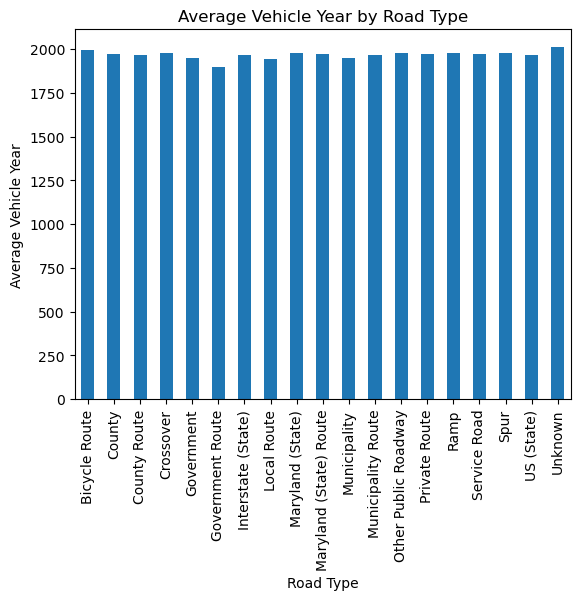

In [67]:
import matplotlib.pyplot as plt #Creating a bar graph to display the average vehicle year in an accident by road type

mean_vehicle_year = df.groupby([ 'Road Type'])['Vehicle Year'].mean()
mean_vehicle_year.plot.bar()

plt.title("Average Vehicle Year by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Average Vehicle Year")

plt.show()

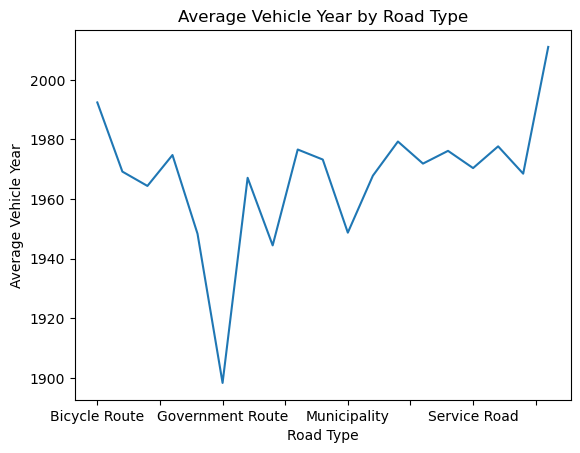

In [69]:
import matplotlib.pyplot as plt #Creating a line plot to display the average vehicle year in an accident by road type

mean_vehicle_year = df.groupby([ 'Road Type'])['Vehicle Year'].mean()
mean_vehicle_year.plot.line()

plt.title("Average Vehicle Year by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Average Vehicle Year")

plt.show()